# 📘 Student Performance Analysis

# 🗃️ 1. Import Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 📥 2. Load and Preview Dataset

In [3]:
dataset = pd.read_csv(r'../data/synthesized_raw_student_data.csv')
dataset.head()

,study_hours_per_day,prep_days_before_exam,attendance_percentage,internal_marks,internal_marks_weight,subject_difficulty,study_material_source,past_performance,self_study_or_coaching,motivation_level,doubt_resolution_time,exam_anxiety_level,final_exam_marks
0,3.03,9.0,77.83,71.78,0.38,3.0,Textbooks,70.11,Coaching,4.0,11.35,3.0,42.5
1,2.66,27.0,97.65,73.44,0.42,4.0,YouTube,37.54,Coaching,3.0,2.32,3.0,48.2
2,3.92,24.0,89.60,68.89,0.54,3.0,Coaching,37.94,Self-study,3.0,9.29,4.0,59.1
3,3.73,1.0,82.37,54.45,0.60,4.0,YouTube,65.74,Self-study,5.0,3.26,3.0,46.3
4,1.98,16.0,93.56,50.52,0.43,3.0,Notes,68.07,Self-study,4.0,6.37,3.0,55.7


# 🧹 3. Data Cleaning

# 🔁 Drop Duplicates

In [4]:
dataset = dataset.drop_duplicates(keep='first')

# 🧪 Fill Missing Values

In [5]:
for i in dataset.select_dtypes(include='float64').columns:
    dataset[i] = dataset[i].fillna(dataset[i].mean())

In [6]:
for i in dataset.select_dtypes(include='object').columns:
    dataset[i] = dataset[i].fillna(dataset[i].mode()[0])


# 🚫 4. Remove Outliers using IQR Method

In [7]:
def iqr_outliers_removal(dataset, column):
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)
    iqr = q3 - q1
    min_range = q1 - (1.5 * iqr)
    max_range = q3 + (1.5 * iqr)
    return dataset[(dataset[column] >= min_range) & (dataset[column] <= max_range)]

In [8]:
outliers_columns = ['study_hours_per_day', 'prep_days_before_exam', 'doubt_resolution_time', 'final_exam_marks']
for col in outliers_columns:
    dataset = iqr_outliers_removal(dataset, col)


# 🏷️ 5. Categorize Students by Performance Level

In [9]:
dataset['performance_level'] = pd.cut (
    dataset['final_exam_marks'],
    bins=(0, 40, 70, 100),
    labels=['low', 'medium', 'high']
)
dataset.head()

,study_hours_per_day,prep_days_before_exam,attendance_percentage,internal_marks,internal_marks_weight,subject_difficulty,study_material_source,past_performance,self_study_or_coaching,motivation_level,doubt_resolution_time,exam_anxiety_level,final_exam_marks,performance_level
0,3.03,9.0,77.83,71.78,0.38,3.0,Textbooks,70.11,Coaching,4.0,11.35,3.0,42.5,medium
1,2.66,27.0,97.65,73.44,0.42,4.0,YouTube,37.54,Coaching,3.0,2.32,3.0,48.2,medium
2,3.92,24.0,89.60,68.89,0.54,3.0,Coaching,37.94,Self-study,3.0,9.29,4.0,59.1,medium
3,3.73,1.0,82.37,54.45,0.60,4.0,YouTube,65.74,Self-study,5.0,3.26,3.0,46.3,medium
4,1.98,16.0,93.56,50.52,0.43,3.0,Notes,68.07,Self-study,4.0,6.37,3.0,55.7,medium



# 📊 6. Data Visualization

# 📌 Performance Level Count

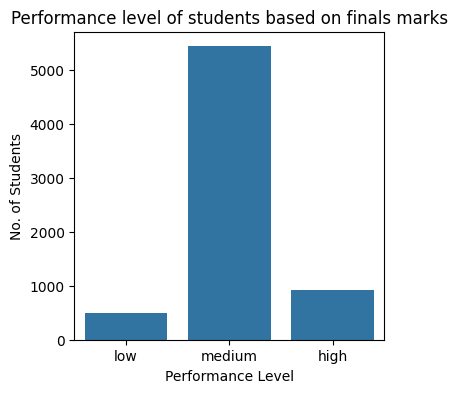

In [10]:
plt.figure(figsize=(4,4))
plt.title('Performance level of students based on finals marks')
sns.countplot(x=dataset['performance_level'])
plt.xlabel('Performance Level')
plt.ylabel('No. of Students')
plt.show()


# 📈 Attendance vs Final Exam Marks

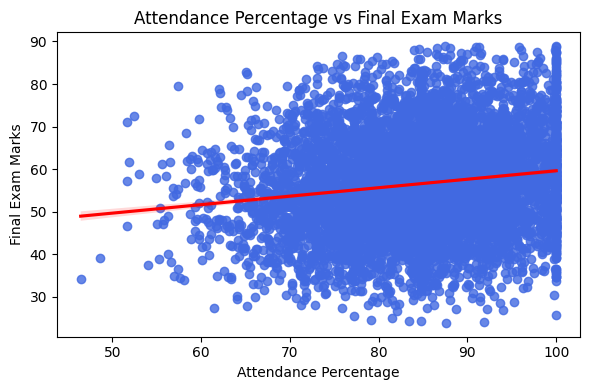

In [27]:
plt.figure(figsize=(6, 4))
sns.regplot(
    data=dataset,
    x='attendance_percentage',
    y='final_exam_marks',
    scatter_kws={'color': 'royalblue'},
    line_kws={'color': 'red'}
)
plt.title('Attendance Percentage vs Final Exam Marks')
plt.xlabel('Attendance Percentage')
plt.ylabel('Final Exam Marks')
plt.tight_layout()
plt.show()



# 🔗 Correlation with Final Exam Marks

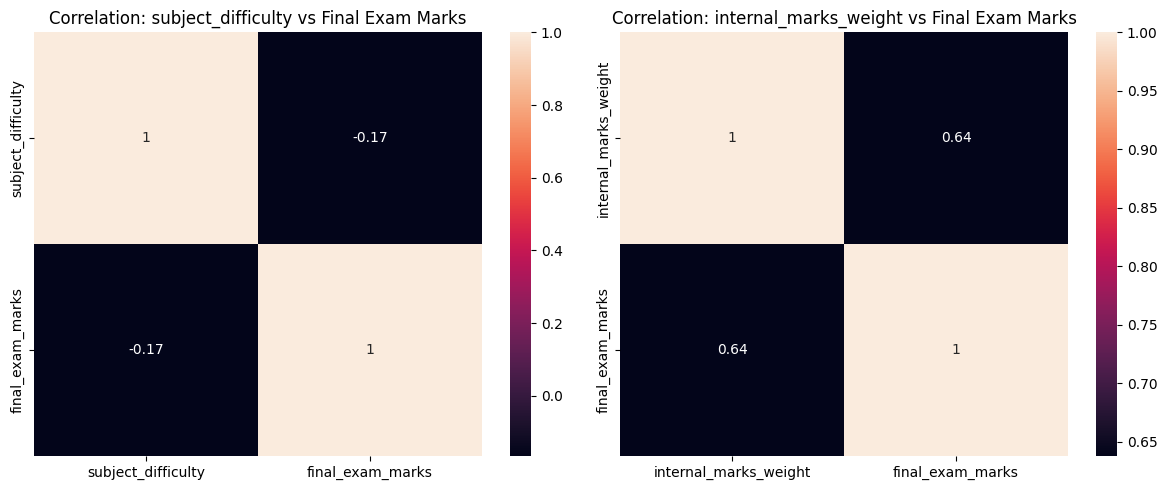

In [37]:
columns = ['subject_difficulty', 'internal_marks_weight']

plt.figure(figsize=(12, 5)) 

for i, col in enumerate(columns, 1):
    plt.subplot(1, 2, i)
    corr_matrix = dataset[[col, 'final_exam_marks']].corr()
    sns.heatmap(corr_matrix, annot=True)
    plt.title(f'Correlation: {col} vs Final Exam Marks')  

plt.tight_layout()
plt.show()



# 😟 Exam Anxiety vs Performance Level

In [29]:
group_means = dataset.groupby('performance_level')['exam_anxiety_level'].mean().sort_index()
print("Average anxiety level per performance level:")
print(group_means)


Average anxiety level per performance level:
performance_level
low       3.322443
medium    3.004404
high      2.784770
Name: exam_anxiety_level, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_4120\2608993717.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = dataset.groupby('performance_level')['exam_anxiety_level'].mean().sort_index()


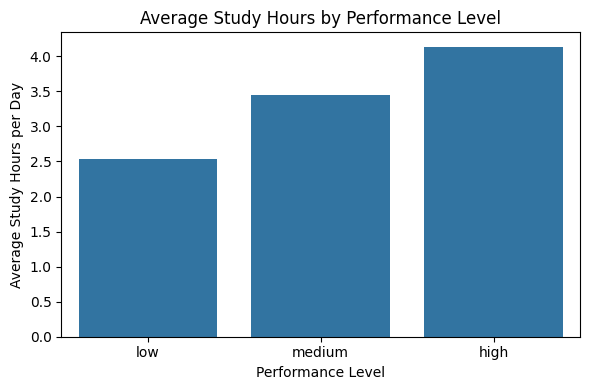

In [19]:
plt.figure(figsize=(6, 4))
sns.barplot(x=group_means.index, y=group_means.values)

plt.title("Average Study Hours by Performance Level")
plt.xlabel("Performance Level")
plt.ylabel("Average Study Hours per Day")
plt.tight_layout()
plt.show()


# 📉 Correlation Heatmap of Key Numeric Features

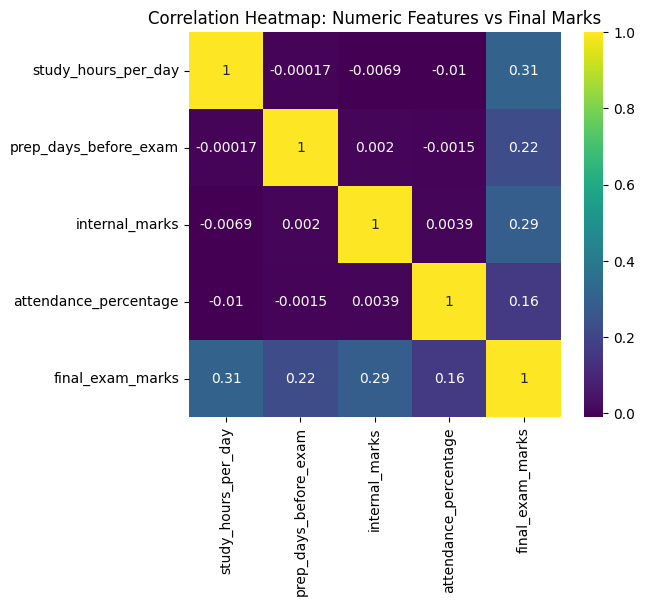

In [33]:
corr = dataset[['study_hours_per_day', 'prep_days_before_exam', 'internal_marks', 'attendance_percentage', 'final_exam_marks']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation Heatmap: Numeric Features vs Final Marks')
plt.show()


# 📈 Internal Marks vs Final Exam Marks (Trend)

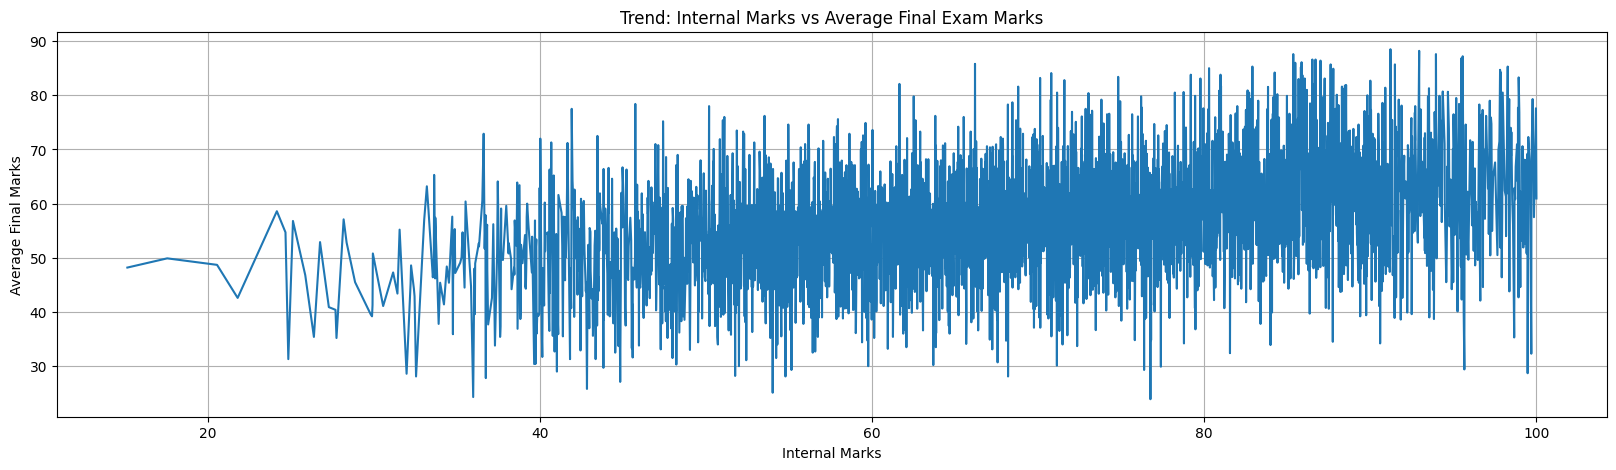

In [31]:
plt.figure(figsize=(20, 5))
grouped = dataset.groupby('internal_marks')['final_exam_marks'].mean().reset_index()
sns.lineplot(data=grouped, x='internal_marks', y='final_exam_marks',)
plt.title('Trend: Internal Marks vs Average Final Exam Marks')
plt.xlabel('Internal Marks')
plt.ylabel('Average Final Marks')
plt.grid(True)
plt.show()